# Importing libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import mlflow

# !pip install mlflow

In [15]:
mlflow.set_experiment("loan_status") # like creating a folder, in which you will store all your experiments info. 

# mlflow.set_tag("mlflow.runName", "third-run")

<Experiment: artifact_location='file:///home/csc/Documents/GitHub/dsml-mlops-streamlit-jan05/mlruns/209624488720310624', creation_time=1705811469661, experiment_id='209624488720310624', last_update_time=1705811469661, lifecycle_stage='active', name='loan_status', tags={}>

# Reading Dataset}

In [16]:
train_df = pd.read_csv('data.csv')

In [17]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
1,LP001385,Male,No,0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,Y
2,LP001926,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
3,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
4,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y


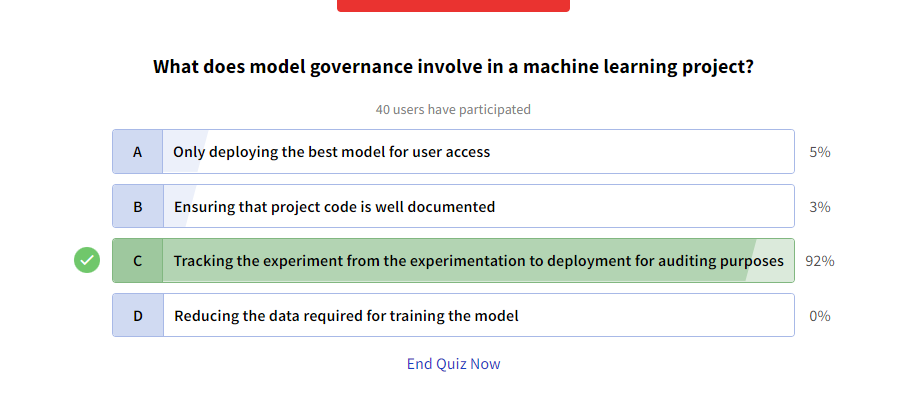

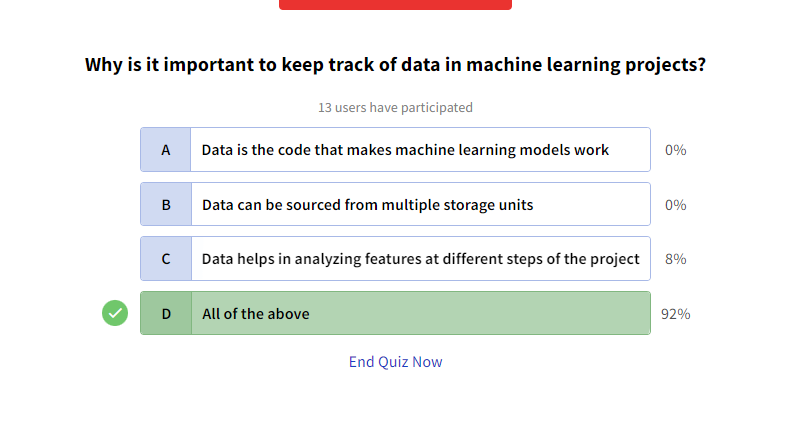

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    object 
 2   Married            427 non-null    object 
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.8+ KB


In [18]:
# I want to use Gender, Married

train_df['Gender'] = train_df['Gender'].map({'Male': 0, 'Female': 1})
train_df['Married'] = train_df['Married'].map({'No': 0, 'Yes': 1})
train_df['Loan_Status'] = train_df['Loan_Status'].map({'N': 0, 'Y': 1})


train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    float64
 2   Married            427 non-null    float64
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 43.8+ KB


In [19]:
train_df.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           14
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term      8
Credit_History       36
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
train_df.dropna(inplace=True)
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Let's create X and Y|

In [21]:
feature_columns = ['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']

X = train_df[feature_columns]
y = train_df['Loan_Status']


mlflow.log_param("feature_columns", feature_columns)

print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (335, 5)
y shape:  (335,)


# Splitting the data into train and test

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [24]:
# import randomforestclassifier

from sklearn.ensemble import RandomForestClassifier

max_depth = 6
model = RandomForestClassifier(max_depth=max_depth, random_state=42)

model.fit(X_train, y_train)

mlflow.log_param("max_depth", max_depth)


6

# Validation on test data

In [25]:
from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
val_accuracy = accuracy_score(y_val, pred_val)

mlflow.log_metric("val_accuracy", val_accuracy)

In [26]:
pred_train = model.predict(X_train)
train_acc = accuracy_score(y_train, pred_train)

mlflow.log_metric("train_accuracy", train_acc)

In [27]:
mlflow.end_run()

# Let's see some other ways of using mlflow logging

In [31]:
with mlflow.start_run():
    # train a random forest model

    max_depth = 7
    model = RandomForestClassifier(max_depth=max_depth, random_state=42)

    model.fit(X_train, y_train)

    mlflow.log_param("max_depth", max_depth)

    mlflow.log_param("feature_columns", feature_columns)

    from sklearn.metrics import accuracy_score

    pred_val = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, pred_val)

    mlflow.log_metric("val_accuracy", val_accuracy)

    pred_train = model.predict(X_train)
    train_acc = accuracy_score(y_train, pred_train)

    mlflow.log_metric("train_accuracy", train_acc)

    mlflow.sklearn.log_model(model, "randomforest-model")

    mlflow.log_artifact("data.csv")




# k-fold cross-validation example

In [ ]:
# # perform 3 fold cross validation and track train and validation accuracy for each fold

# from sklearn.model_selection import KFold

# kf = KFold(n_splits=3, random_state=42, shuffle=True)

# for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
#     print(f"fold: {fold}")
#     X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
#     X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

#     with mlflow.start_run(run_name=f"random-forest-{fold}"):

#         max_depth = 7
#         model = RandomForestClassifier(max_depth=max_depth, random_state=42)

#         model.fit(X_train, y_train)

#         mlflow.log_param("max_depth", max_depth)

#         mlflow.log_param("feature_columns", feature_columns)

#         from sklearn.metrics import accuracy_score

#         pred_val = model.predict(X_val)
#         val_accuracy = accuracy_score(y_val, pred_val)

#         mlflow.log_metric("val_accuracy", val_accuracy)

#         pred_train = model.predict(X_train)
#         train_acc = accuracy_score(y_train, pred_train)

#         mlflow.log_metric("train_accuracy", train_acc)

#         mlflow.sklearn.log_model(model, "randomforest-model")

#         mlflow.log_artifact("loan.csv")

In [32]:
def mlflow_runs(n_est,max_dep,i):
    with mlflow.start_run():

        model_rf = RandomForestClassifier(n_estimators=n_est, max_depth=max_dep, random_state=5)
        model_rf.fit(X_train, y_train)

        pred_val = model_rf.predict(X_val)
        val_acc=accuracy_score(y_val, pred_val)

        pred_train = model_rf.predict(X_train)
        train_acc=accuracy_score(y_train, pred_train)

        run="hyperparameter_run_"+str(i)
        mlflow.set_tag('mlflow.runName',run)
        mlflow.log_param('n_estimators',n_est)
        mlflow.log_param('max_depth',max_dep)
        mlflow.log_metric('val_acc',val_acc)
        mlflow.log_metric('train_acc',train_acc)
        mlflow.set_tag('data file','data_new.csv')

        mlflow.sklearn.log_model(model_rf, "model")


mlflow_runs(10,2,1)
mlflow_runs(20,2,2)
mlflow_runs(40,2,3)
mlflow_runs(10,4,4)
mlflow_runs(20,4,5)
mlflow_runs(40,4,6)
mlflow_runs(10,8,7)
mlflow_runs(20,8,8)
mlflow_runs(40,8,9)
[1, 2, 5, 10 , 20]


[1, 2, 5, 10, 20]

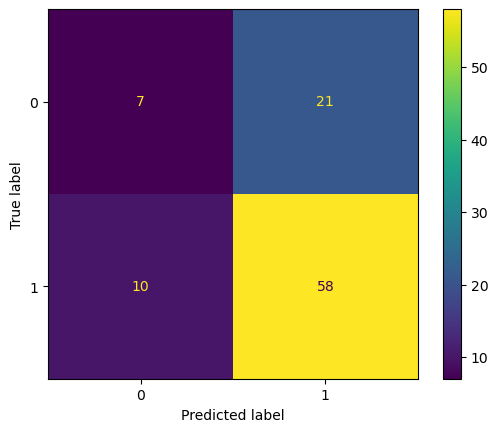

In [18]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

with mlflow.start_run():
    knn_model= KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)

    pred_val = knn_model.predict(X_val)
    val_acc=accuracy_score(y_val, pred_val)

    pred_train = knn_model.predict(X_train)
    train_acc=accuracy_score(y_train, pred_train)

    run="KNN"
    mlflow.set_tag('mlflow.runName',run)
    mlflow.log_param('neighbors',5)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train_acc',train_acc)
    mlflow.set_tag('data file','data_new.csv')

    cm=ConfusionMatrixDisplay.from_predictions( y_val,pred_val)
    cm.figure_.savefig('confusion_mat.png')
    mlflow.log_artifact('confusion_mat.png')

    mlflow.sklearn.log_model(knn_model, "model")

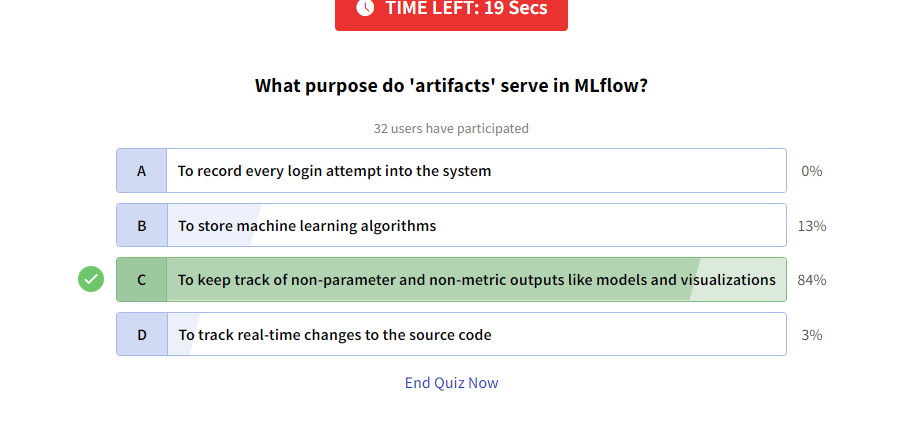

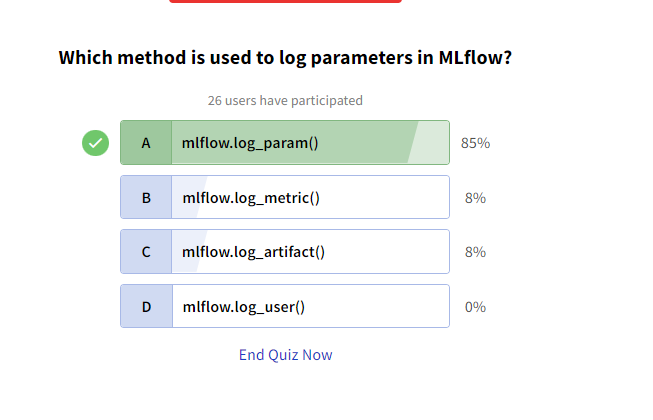


* In machine learning, the concept of "drift" refers to changes in the data or environment that a model interacts with, which can lead to a decline in the model's performance over time. There are mainly three types of drift you might encounter: concept drift, model drift, and data drift. Understanding these is crucial for maintaining the accuracy and relevance of machine learning models in production.

    1. **Concept Drift**:
        - **Definition**: Concept drift occurs when the statistical properties of the target variable, which the model is trying to predict, change over time. This means the relationships between input data and the target variable change.
        - **Example**: In a fraud detection system, fraudsters might change their strategies, and thus the pattern of fraudulent transactions changes over time. A model trained on old patterns might not recognize new types of fraud.
        - **Mitigation**: Regularly retraining the model with recent data, using online learning algorithms, or employing drift detection mechanisms can help in addressing concept drift.

    2. **Model Drift**:
        - **Definition**: Model drift is a broader term that usually refers to the deterioration of a model's performance over time. This can be due to concept drift, but it might also be due to changes in the input data distribution or other external factors not captured directly by the data.
        - **Example**: If a model was trained on data from a specific time period or under certain conditions, and these conditions change significantly (like a change in market behavior or user preferences), the model's predictions may become less accurate.
        - **Mitigation**: Continuous monitoring of model performance metrics, regular updates, and retraining with new data can help manage model drift.

    3. **Data Drift**:
        - **Definition**: Data drift refers to a change in the model's input data distribution. This change does not necessarily imply a change in the relationship between inputs and outputs (as in concept drift) but can still affect model performance.
        - **Example**: In a loan approval model, if the economic conditions change, the profile of loan applicants (like their income levels, employment status) might change. Even if the criteria for approving loans remain the same, the model might perform differently because the nature of the input data has changed.
        - **Mitigation**: Techniques like feature monitoring, employing data validation rules, and adapting the model to the new data distribution are common ways to handle data drift.

* Reasons for data-drift
    - Changes in data collection process
    - Changes in data source
    - Changes in user behavior

    
* Common Strategies for Handling Drift:

    - **Regular Model Evaluation and Retraining**: Frequently evaluate the model against recent data and retrain it if necessary.
    - **Drift Detection Algorithms**: Implement algorithms that can automatically detect drift in data or concept and alert when such changes occur.
    - **Robust Model Design**: Design models that are robust to minor changes in the data distribution.
    - **Feature Engineering**: Update or modify features in response to observed drifts.